<a href="https://colab.research.google.com/github/shajitha11/ML-/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded=files.upload()

Saving income.csv to income.csv


In [3]:
df=pd.read_csv("income.csv")
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'income')

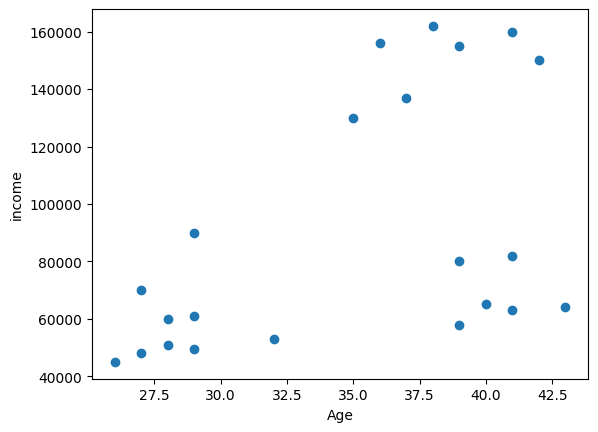

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel("Age")
plt.ylabel("income")

In [6]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

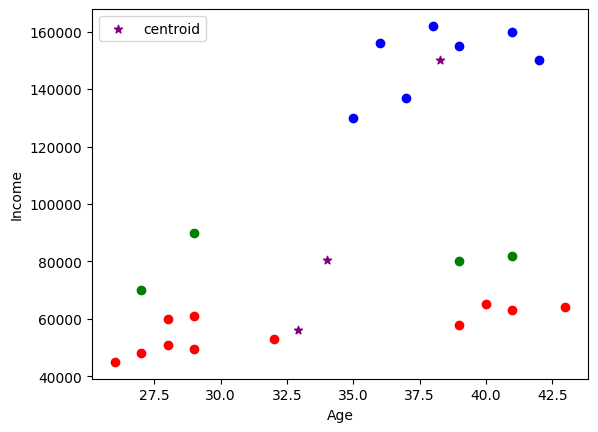

In [12]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='centroid',color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [17]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


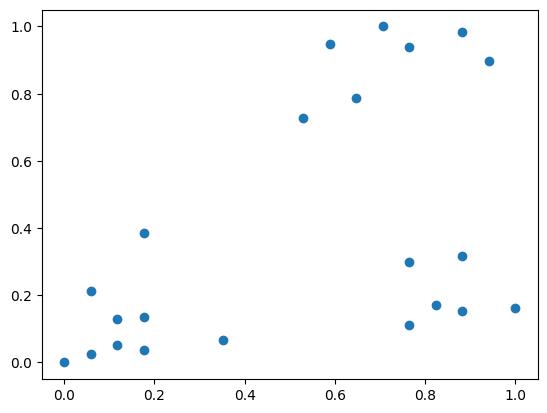

In [19]:
plt.scatter(df.Age,df['Income($)'])

In [22]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [23]:
df['clusters']=y_pred
df.head()

,Name,Age,Income($),cluster,clusters
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


In [26]:
df.drop('cluster',axis=1,inplace=True)

In [27]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

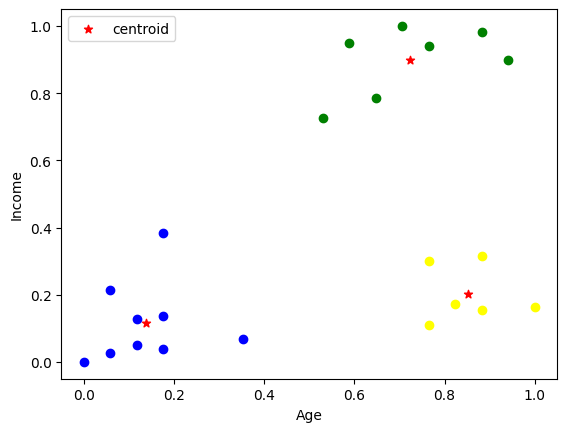

In [29]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()